# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

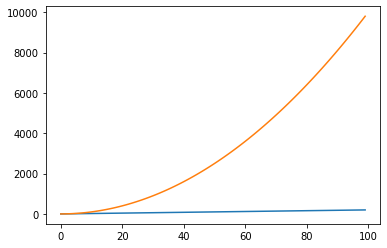

In [4]:
# Method 1
plt.plot(x,y)
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

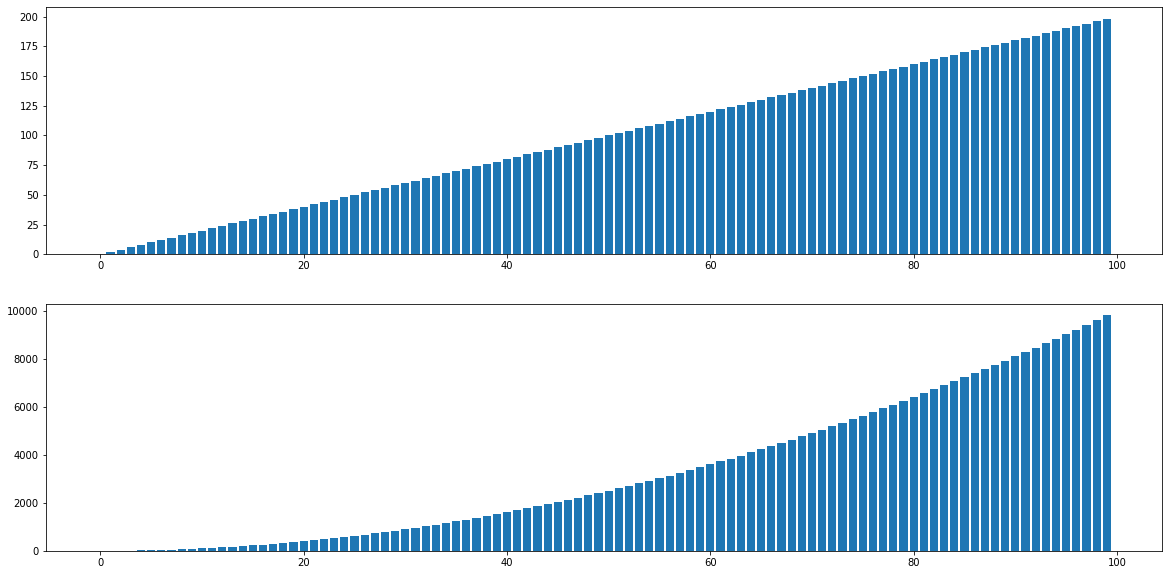

In [5]:
# Method 2
fig_options, (chart_1, chart_2)=plt.subplots(nrows=2, ncols=1, figsize=(20,10))
chart_1.bar(x, y)
chart_2.bar(x, z)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

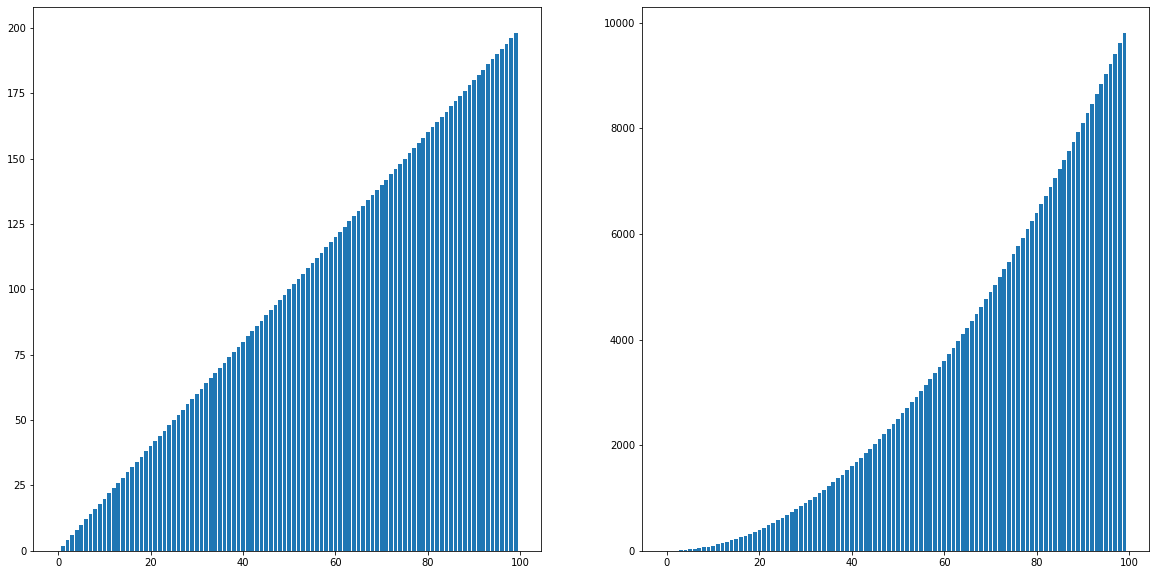

In [6]:
fig_options, (chart_1, chart_2)=plt.subplots(nrows=1, ncols=2, figsize=(20,10))
chart_1.bar(x, y)
chart_2.bar(x, z)
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [7]:
# your code here
import math


In [44]:
y1=np.exp(x)
y2=np.log(x)
# I am not sure how to plot the y....

C:\Users\Alina Hartsch\AppData\Local\Temp\ipykernel_8516\695650634.py:2: RuntimeWarning: divide by zero encountered in log
  y2=np.log(x)


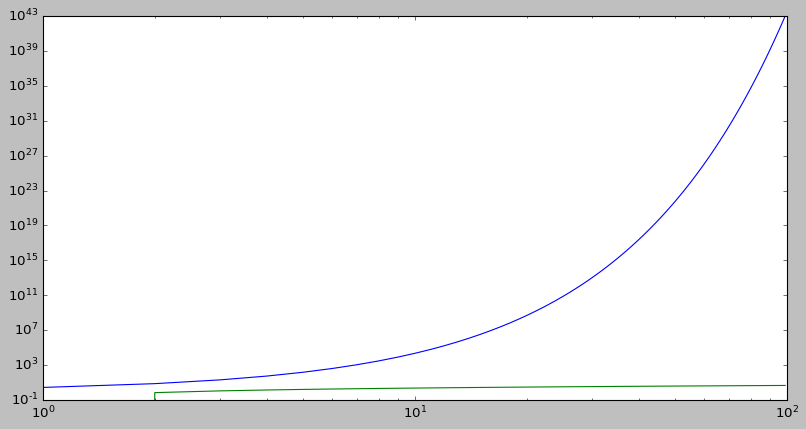

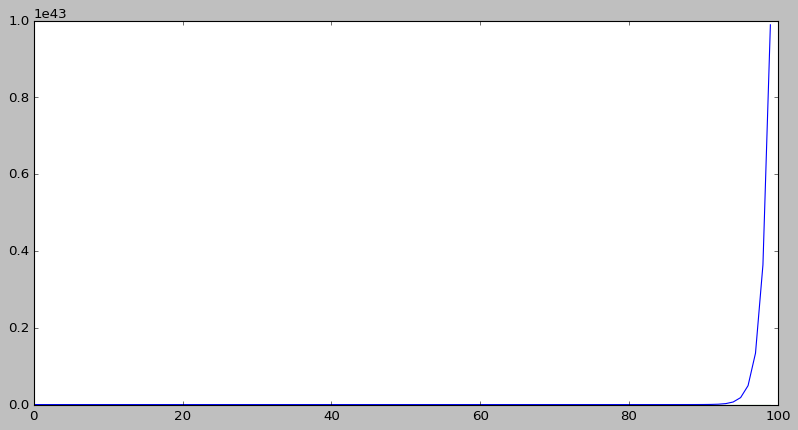

In [45]:
plt.plot(x, y1, x, y2)
plt.yscale('log') #logarithmic scale 
plt.xscale('log')
plt.show()


plt.plot(x, y1, x, y2)
plt.yscale('linear') #linear scale
plt.xscale('linear')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

Text(0, 0.5, 'logarithmic scale')

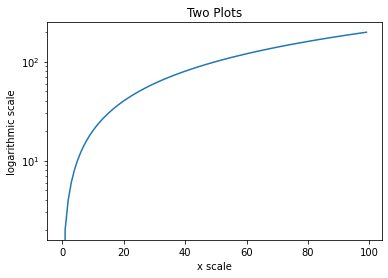

In [9]:
    plt.plot(x,y)
    plt.yscale('log')
    plt.title("Two Plots")
    plt.xlabel("x scale")
    plt.ylabel("logarithmic scale")

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [10]:
fitbit=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 3\lab-matplotlib-seaborn\your-code\Fitbit2.csv")
fitbit.head(2)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.0,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.4,92.086331,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

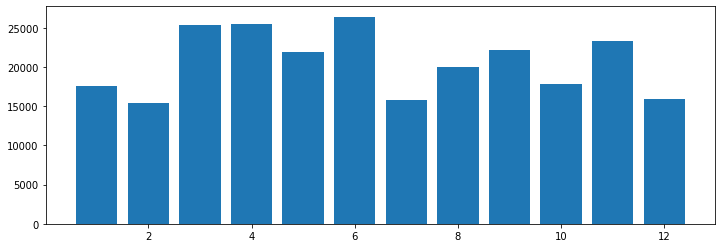

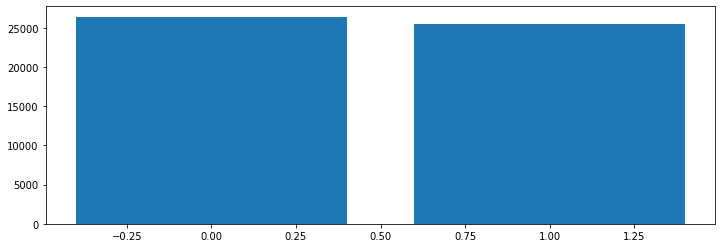

In [11]:
# MEDIAN STEPS BY MONTH_ENCODED
plt.figure(figsize=(12,4))
plt.bar(fitbit['Months_encoded'], fitbit['Steps'])
plt.xticks(fontsize=10)
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
plt.figure(figsize=(12,4))
plt.bar(fitbit['Work_or_Weekend'], fitbit['Steps'])
plt.xticks(fontsize=10)
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

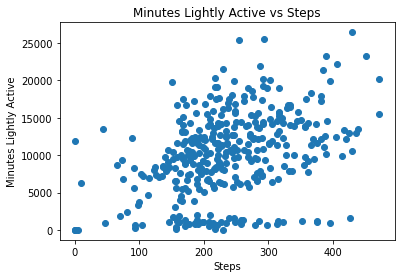

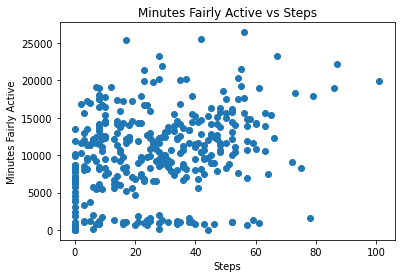

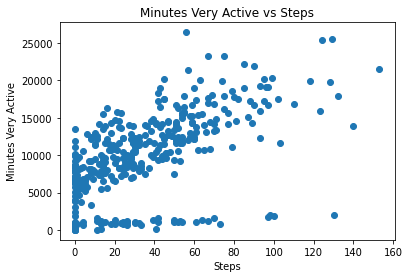

In [12]:
#First scattering without a loop to understand what's going on
x=fitbit['Minutes Lightly Active']
y=fitbit['Steps']
plt.scatter(x,y)
plt.title("Minutes Lightly Active vs Steps")
plt.xlabel("Steps")
plt.ylabel("Minutes Lightly Active")
plt.show()


x=fitbit['Minutes Fairly Active']
y=fitbit['Steps']
plt.scatter(x,y)
plt.title("Minutes Fairly Active vs Steps")
plt.xlabel("Steps")
plt.ylabel("Minutes Fairly Active")
plt.show()

x=fitbit['Minutes Very Active']
y=fitbit['Steps']
plt.scatter(x,y)
plt.title("Minutes Very Active vs Steps")
plt.xlabel("Steps")
plt.ylabel("Minutes Very Active")
plt.show()

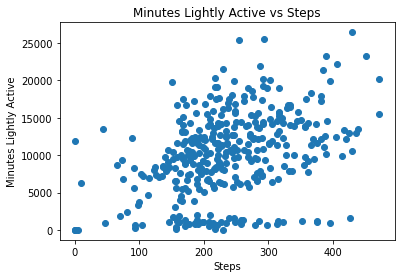

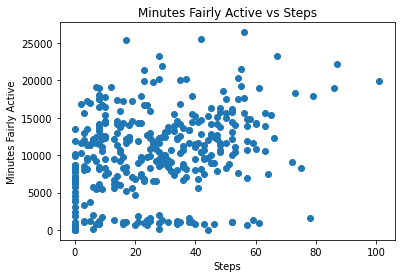

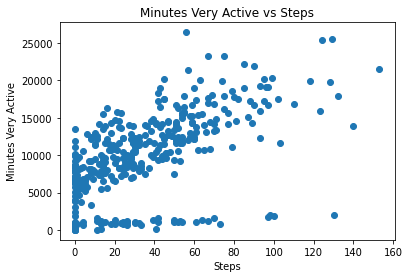

In [13]:
#now scatter plots with loop
column_list=['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']

for column in column_list:
    x=fitbit[column]
    y=fitbit['Steps']
    plt.scatter(x,y)
    plt.title(column + " vs Steps")
    plt.xlabel("Steps")
    plt.ylabel(column)
    plt.show()


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [3]:
titanic=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 3\lab-matplotlib-seaborn\your-code\titanic.csv")
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Explore the titanic dataset using Pandas dtypes.

In [5]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [6]:
# NUMERICAL VARIABLES
titanic.select_dtypes(exclude='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [7]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [8]:
import matplotlib.style
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12.0, 6.0]


#### Use the right visulalization to show the distribution of column `Age`.

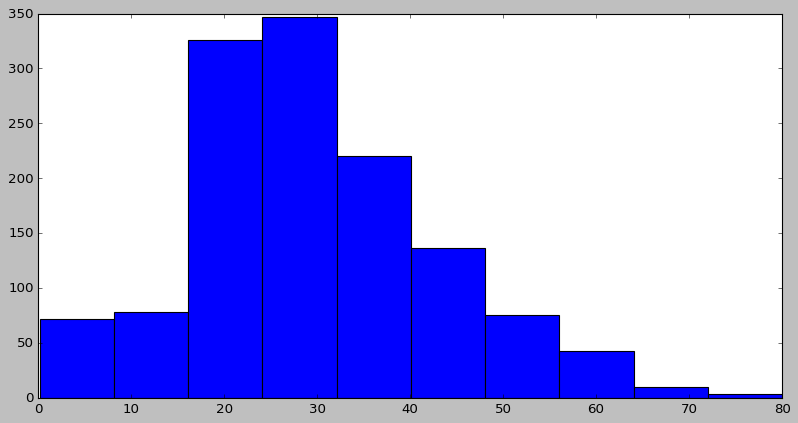

In [10]:
# your code here
plt.hist(titanic['Age'])
plt.show()


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 85., 162., 963.]),
 array([ 0, 10, 20, 50]),
 <BarContainer object of 3 artists>)

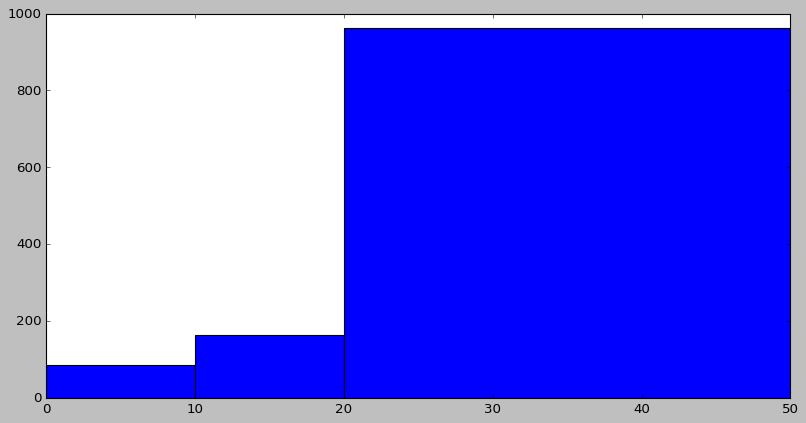

In [11]:
# your code here
plt.hist(titanic['Age'], bins=[0, 10, 20, 50])

#### How does the bin size affect your plot?

In [12]:
"""
wthout bins you could see that most people on the boat were 30 followed by people in their 20s
with bins it shows you that most people fall into the group between 20-50 but without having more granularity on it.
"""

'\nwthout bins you could see that most people on the boat were 30 followed by people in their 20s\nwith bins it shows you that most people fall into the group between 20-50 but without having more granularity on it.\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

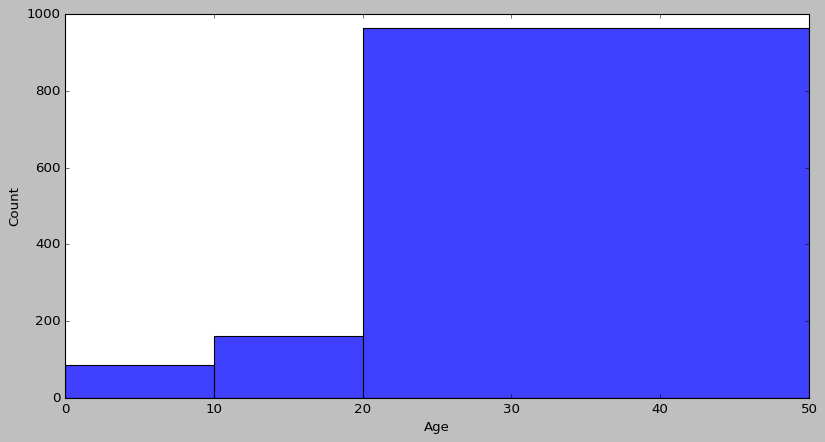

In [13]:
# your code here
sns.histplot(data=titanic, x="Age", bins=[0, 10, 20, 50])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [14]:
# Method 1 - matplotlib
#First grouping people by gender and get the count for each gender
gender_group = titanic.groupby(['Gender']).agg({'Gender': 'count'}) #!!!!!!
gender_group.columns = ['count']
gender_group = gender_group.reset_index()
gender_group


,Gender,count
0,female,466
1,male,843


([<matplotlib.patches.Wedge at 0x29cee683550>,
 [Text(0.480836864838257, 0.9893411491555963, 'female'),
  Text(-0.4808369574670582, -0.9893411041363958, 'male')])

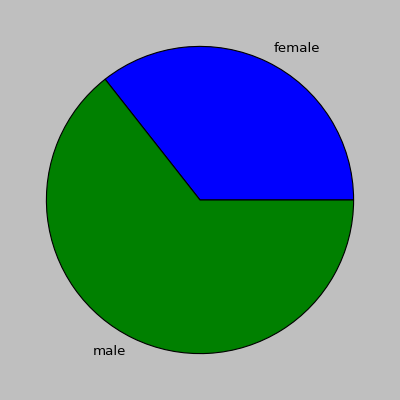

In [15]:
plt.pie(gender_group['count'], labels=gender_group['Gender'])

C:\Users\Alina Hartsch\anaconda3\envs\projectsql\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

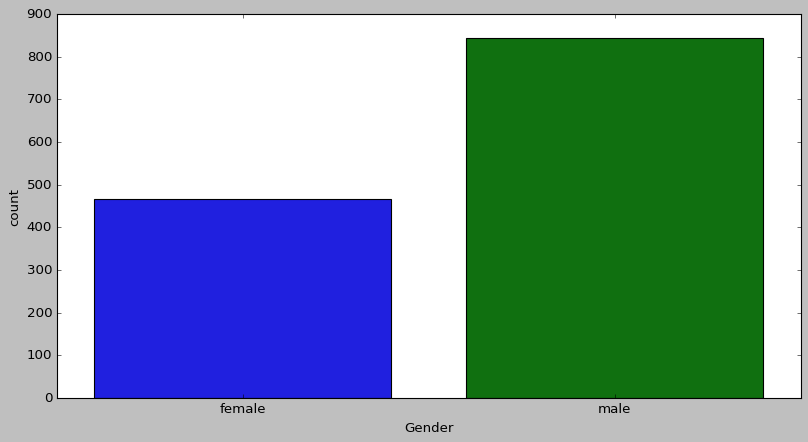

In [16]:
# Method 2 - seaborn
sns.barplot(gender_group['Gender'], gender_group['count'])

#### Use the right plot to visualize the column `Pclass`.

In [24]:
# your code here

pclass_grouped=titanic.groupby('Pclass').agg({'PassengerId':'count'})

pclass_grouped.rename(columns = {'PassengerId':'count'}, inplace = True)
pclass_grouped=pclass_grouped.reset_index()

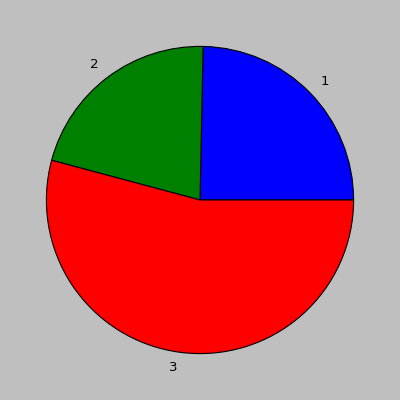

In [27]:
plt.pie(pclass_grouped['count'], labels=pclass_grouped['Pclass'])
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [40]:
#.describe()
summary_age=titanic['Age'].describe()
summary_age=summary_age.drop(labels=['count'])
summary_age

mean    29.879186
std     13.448335
min      0.170000
25%     22.000000
50%     28.500000
75%     37.000000
max     80.000000
Name: Age, dtype: float64

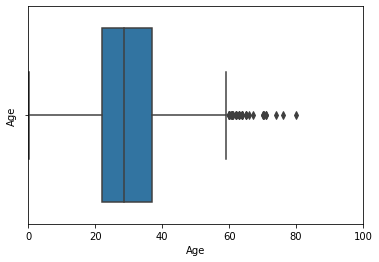

In [5]:
#summary statistic of age using boxplots
plt.xlim(0,100)
plt.ylabel('Age')
sns.boxplot(x=titanic['Age'])
plt.show()


#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
the boxplot shows us the distribution of the age. I can see that 50% of the people on 
board were between 20 and 40 years old. 
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

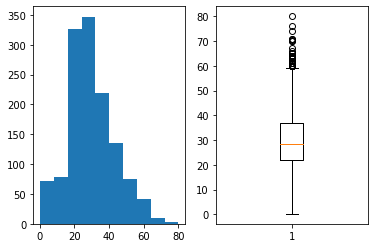

In [10]:
#combine both plots in one plot with two subplots

fig, [ax1, ax2] = plt.subplots(1,2)
ax1.hist(titanic['Age'])
ax2.boxplot(x=titanic['Age'])
plt.show()




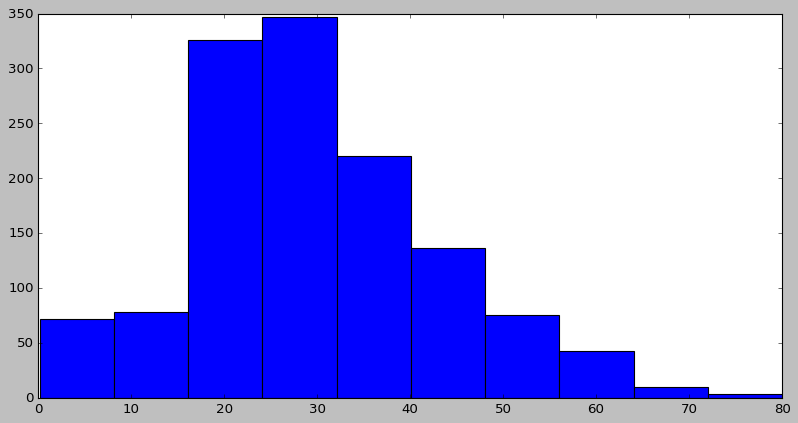

In [28]:
# Histogram --> distribution

plt.hist(titanic['Age'])
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""""
it shows a more granualr distribution of the age than the boxplot or the bins
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

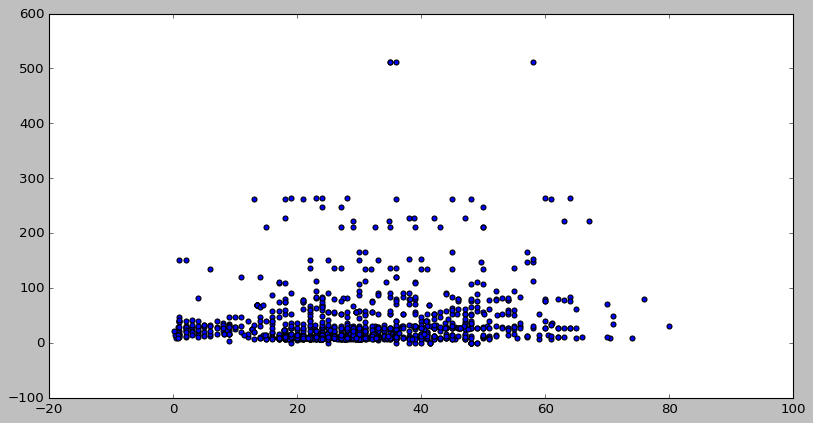

In [26]:
# Method 1 - matplotlib
plt.scatter(titanic['Age'], titanic['Fare'])
# the scatter plot shows that most people had a very low fair and we have some outlayers on the top 
# that probably falsify our analysis and should be excluded. Can't really see a strong correlatiin from this plot

C:\Users\Alina Hartsch\anaconda3\envs\projectsql\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


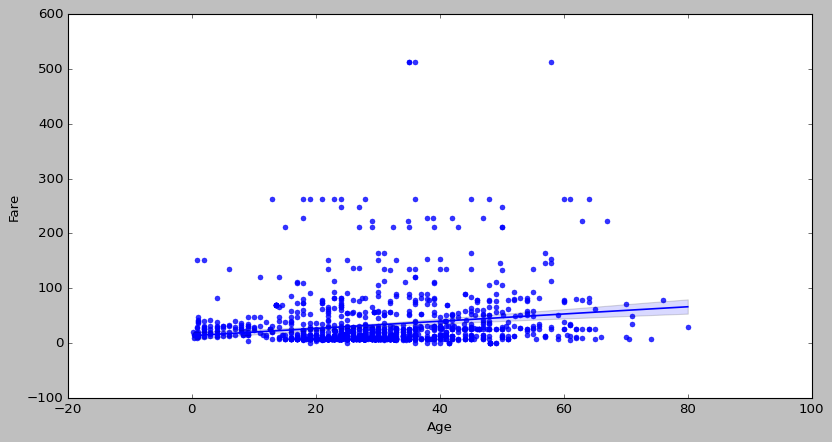

In [27]:
# Method 2 - seaborn
# your code here
sns.regplot(titanic['Age'], titanic['Fare'] , data=titanic)
plt.show()
#seaborn makes it easier to see a correlation since it includes a trendline that is slightly increased
#So we have a slight positive correlation

#### Plot the correlation matrix using seaborn.

In [28]:
# your code here
only_numeric=titanic.select_dtypes(include=np.number)
only_numeric.corr()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


#### What are the most correlated features?

In [ ]:

"""
Fare & Pclass are negatively correlated 
Age & Pclass are negatively correlated
Survived & Pclass are negatively correlated too
"""

'\n\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

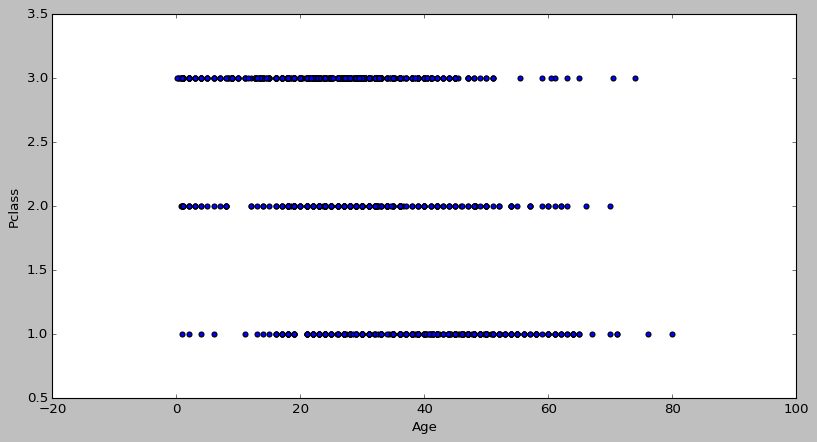

In [40]:
plt.scatter(titanic['Age'], titanic['Pclass'])
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

KeyboardInterrupt: 

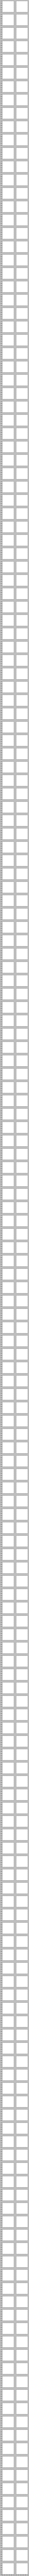

In [47]:
# your code here

sns.FacetGrid(data=titanic, col='Gender', row='Age')
plt.show()

#my kernel dies trying this...